# DASK

Dask is an open source library for parallel computing written in Python.
Dask is a library composed of two parts. 
It includes a task scheduling component for building dependency graphs and scheduling tasks. Second, it includes the distributed data structures with APIs similar to Pandas Dataframes or NumPy arrays. Dask has a variety of use cases and can be run with a single node and scale to thousand node clusters. (Source: [Wiki](https://en.wikipedia.org/wiki/Dask_(software)))

So let's start with `dask.distributed` and a `client`. This is necessary to give dask information about your machine.

For us at the point just `Client()`is important. The documentation can be found [here](https://distributed.dask.org/en/stable/api.html#distributed.Client)

with `(n_workers=4, threads_per_worker=8)`
The CPU cores and threads are adressed, if left empty, ALL cores and threads will be used.

In [ ]:
## Import of standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from dask.distributed import Client

client = Client()


with cluster, you will get an overview of the cluster you've just setted up and an access to the dashboard. For displaying the display, the library [Bokeh](https://bokeh.org/) is needed.

In [2]:
client.cluster

Opening the Dashboard can be done by just clicking on the link. 

The Dashboard is explained in detail [here](https://docs.dask.org/en/stable/diagnostics-distributed.html)

### First steps with Dask (dask.delayed)

Lets write a function and adding some sleep. (So there is some time difference and we don't need to add data :) )

In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

Let's time the functions with the magic command `%%time`

morge magic commands can be found [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [4]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 292 ms, sys: 43 ms, total: 335 ms
Wall time: 3.01 s


To parallelize custom algorithms the `dask.delayed` interface can be used. 

The documentation can be found [here](https://docs.dask.org/en/stable/delayed.html)

In [3]:
from dask import delayed

In [6]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 729 µs, sys: 217 µs, total: 946 µs
Wall time: 907 µs


As you can see the processes are way faster..

 `BUT WAIT we implemented 3 *1 second, and time travel is not invented. ``

Yes, but we were using a parallel code, so it must be faster...! Sure, but not less than 1 second, because a time machine is not invented! 

What you are seeing here is a method called `Lazy execution'. That means, it does not actually process the data available till it has to.
In the first step dask prepares all the necessary steps, but is not calculating or executing the task. (docu lazy execution can be found [here](https://tutorial.dask.org/01x_lazy.html))
 This is done with the command .compute() (docu for compute() [here](https://docs.dask.org/en/stable/api.html?highlight=compute()#dask.compute))



In [7]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 466 ms, sys: 193 ms, total: 659 ms
Wall time: 2.43 s


5

Tada... 1/3 faster than the original code, thanks to dask.

Now, let's have a look at what dask did in the background. this can be done with .visualize()  ([link to the docu](https://docs.dask.org/en/stable/graphviz.html?highlight=visualize#visualize-task-graphs))

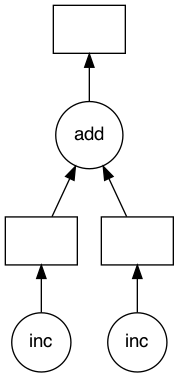

In [8]:
z.visualize()

As we can see we have 2 inlets, which could be paralize, and a `future`the add. 

`A future is a reference or task , which is addressed in the future.  it is an empty lable until the calculation is complete. `


Now let's parallize a `for loop`

In [9]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

A classical for loop is given here:

In [10]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 703 ms, sys: 111 ms, total: 814 ms
Wall time: 8.03 s


8 seconds, is a long time!  Now lets make it faster by adding `delayed`to the function. 

In [11]:
%%time
# Your parallel code here...

results = []
for x in data:
    y = delayed(inc)(x) ### Here 
    results.append(y)
    
total = delayed(sum)(results) ### And Here

CPU times: user 1.62 ms, sys: 1.18 ms, total: 2.81 ms
Wall time: 2.13 ms


Don't forget to compute !

In [12]:
%%time

total.compute()

CPU times: user 124 ms, sys: 29.2 ms, total: 154 ms
Wall time: 1.05 s


44

WOW! just 1 second instead of 8? But how? Lets have a look at the graph. 

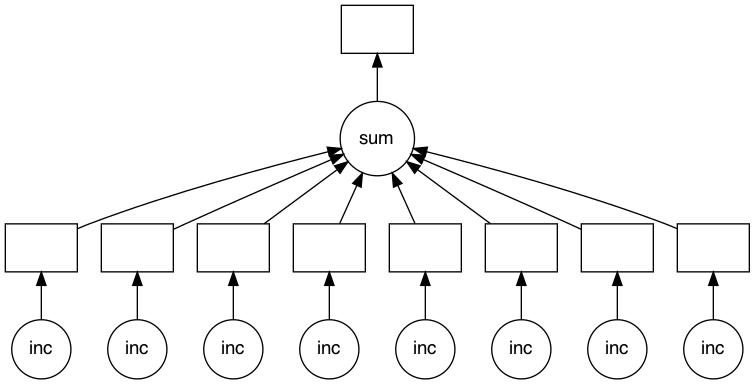

In [13]:
total.visualize()

Here you can see that most of the calculation can run in parallel. In comparison the non parallelized version can be found below. 

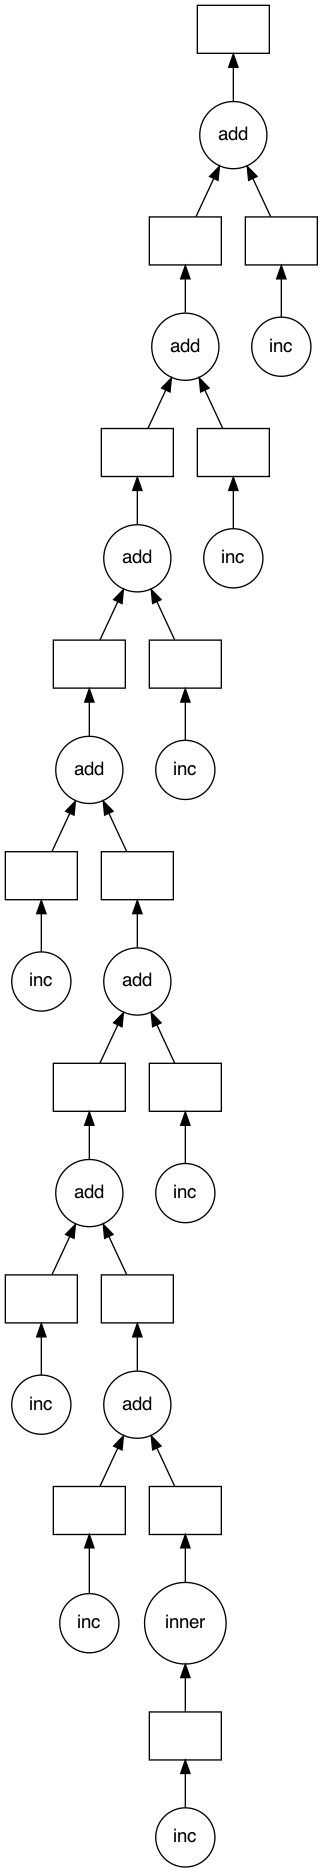

In [14]:
sum(results).visualize()

Which is way more complicated. 

An alternative to write a delayed code is by using `@delayed`

In [15]:
@delayed
def inc(x):
    return x + 1

In [29]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 914 µs, sys: 242 µs, total: 1.16 ms
Wall time: 1.06 ms


In [30]:
%%time

total.compute()

CPU times: user 46.3 ms, sys: 13.3 ms, total: 59.6 ms
Wall time: 99.5 ms


44

To visualize this the following expression might help 

```python
delayed(inc)(1) + delayed(inc)(2)
```

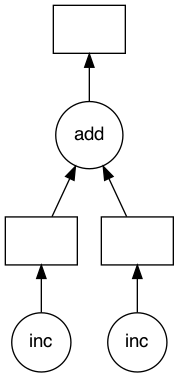

In [32]:
(delayed(inc)(1) + delayed(inc)(2)).visualize()

For an best practice overview of `dask.delayed`follow [this link](https://docs.dask.org/en/stable/delayed-best-practices.html)

# Dask Array's

Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms. Simply put: distributed Numpy.

*  **Parallel**: Uses all of the cores on your computer
*  **Larger-than-memory**:  Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
*  **Blocked Algorithms**:  Perform large computations by performing many smaller computations

**Related Documentation**

* [Array documentation](https://docs.dask.org/en/latest/array.html)
* [Array screencast](https://youtu.be/9h_61hXCDuI)
* [Array API](https://docs.dask.org/en/latest/array-api.html)
* [Array examples](https://examples.dask.org/array.html)

### Create data

In [ ]:
#%run prep.py -d random

## Blocked Algorithms

A *blocked algorithm* executes on a large dataset by breaking it up into many small blocks.

For example, consider taking the sum of a billion numbers.  We might instead break up the array into 1,000 chunks, each of size 1,000,000, take the sum of each chunk, and then take the sum of the intermediate sums.

We achieve the intended result (one sum on one billion numbers) by performing many smaller results (one thousand sums on one million numbers each, followed by another sum of a thousand numbers.)

We do exactly this with Python and NumPy in the following example:

[h5py](https://docs.h5py.org/en/stable/quick.html): 

An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

    Groups work like dictionaries, and datasets work like NumPy arrays

Suppose someone has sent you a HDF5 file, mytestfile.hdf5. (To create this file, read Appendix: Creating a file.) The very first thing you’ll need to do is to open the file for reading

In [16]:
# Load data with h5py
# this creates a pointer to the data, but does not actually load
import os

import h5py

f = h5py.File(os.path.join("data", "random.hdf5"), mode="r")
dset = f["/x"]

lets have a look at the `dset`

In [17]:
dset

<HDF5 dataset "x": shape (1000000000,), type "<f4">

Before using dask, let's consider the concept of blocked algorithms. We can compute the sum of a large number of elements by loading them chunk-by-chunk, and keeping a running total.

Here we compute the sum of this large array on disk by 

1.  Computing the sum of each 1,000,000 sized chunk of the array
2.  Computing the sum of the 1,000 intermediate sums

Note that this is a sequential process in the notebook kernel, both the loading and summing.

In [19]:
# Compute sum of large array, one million numbers at a time
sums = []
for i in range(0, 1_000_000_000, 1_000_000):
    chunk = dset[i : i + 1_000_000]  # pull out numpy array
    sums.append(chunk.sum())

total = sum(sums)
print(total)

999929429.5625


In addition the average might also be interesting!

In [ ]:
# Compute the mean of the array
sums = []
lengths = []
for i in range(0, 1_000_000_000, 1_000_000):
    chunk = dset[i : i + 1_000_000]  # pull out numpy array
    sums.append(chunk.sum())
    lengths.append(len(chunk))

total = sum(sums)
length = sum(lengths)
print(total / length)

 No lets come to `dask.array`, because it  contains these algorithms, also! 


**Create `dask.array` object**

You can create a `dask.array` `Array` object with the `da.from_array` function.  This function accepts

1.  `data`: Any object that supports NumPy slicing, like `dset`
2.  `chunks`: A chunk size to tell us how to block up our array, like `(1_000_000,)`

In [26]:
import dask.array as da

x = da.from_array(dset, chunks=(1_000_000,))

In [27]:
x

dask.array<array, shape=(1000000000,), dtype=float32, chunksize=(1000000,), chunktype=numpy.ndarray>

**Manipulate `dask.array` object as you would a numpy array**

Now that we have an `Array` we perform standard numpy-style computations like arithmetic, mathematics, slicing, reductions, etc..

The interface is familiar, but the actual work is different. `dask_array.sum()` does not do the same thing as `numpy_array.sum()`.

**What's the difference?**

`dask_array.sum()` builds an expression of the computation. It does not do the computation yet. `numpy_array.sum()` computes the sum immediately.

*Why the difference?*

Long answer: Dask arrays are split into chunks. Each chunk must have computations run on that chunk explicitly. If the desired answer comes from a small slice of the entire dataset, running the computation over all data would be wasteful of CPU and memory.


Short Answer: lazy execution

In [29]:
%%time
result = x.sum()
result

CPU times: user 5.11 ms, sys: 138 µs, total: 5.25 ms
Wall time: 5.23 ms


dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [31]:
%%time
result.compute()

CPU times: user 1.05 s, sys: 70.2 ms, total: 1.12 s
Wall time: 1.77 s


999929500.0

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.311118 to fit


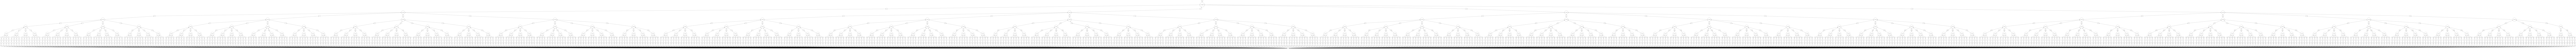

In [32]:
result.visualize()

As you can see the execution graph is to large to be shown, if you click on the small icon you can open it and see the large visualized graph.

<details>
<summary>How would you calculate the mean? (solution is given)</summary>
<br>
`mean = x.mean()`
`mean.compute()`
</details>

Performance comparison
---------------------------

The following experiment was performed on a heavy personal laptop.  Your performance may vary.  If you attempt the NumPy version then please ensure that you have more than 4GB of main memory.

**NumPy: 19s, Needs gigabytes of memory**

```python
import numpy as np

%%time 
x = np.random.normal(10, 0.1, size=(20000, 20000)) 
y = x.mean(axis=0)[::100] 
y

CPU times: user 19.6 s, sys: 160 ms, total: 19.8 s
Wall time: 19.7 s
```

**Dask Array: 4s, Needs megabytes of memory**

```python
import dask.array as da

%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(1000, 1000))
y = x.mean(axis=0)[::100] 
y.compute() 

CPU times: user 29.4 s, sys: 1.07 s, total: 30.5 s
Wall time: 4.01 s
```

**Discussion**

Notice that the Dask array computation ran in 4 seconds, but used 29.4 seconds of user CPU time. The numpy computation ran in 19.7 seconds and used 19.6 seconds of user CPU time.

Dask finished faster, but used more total CPU time because Dask was able to transparently parallelize the computation because of the chunk size.

*Questions*
*  What happens if the dask chunks=(20000,20000)?
    * Will the computation run in 4 seconds?
    * How much memory will be used?
* What happens if the dask chunks=(25,25)?
    * What happens to CPU and memory?

<details>
<summary> 1. What happens if the dask chunks=(20000,20000)?</summary>
<br>
 Specify really large, it will be just on single np array and the benefit of parallel computation will not be given
</details>

<details>
<summary> 2. What happens if the dask chunks=(25,25)?</summary>
<br>
 Overhead will kill you :)  Which means, the cpu has way to much to do. Memory won't be an issue. 
</details>

<details>
<summary> 3. How to find the golden Chunk size?</summary>
<br>
It depens on your computional possibilities and the data size you got. One always has to find a sweet spot. 
</details>

# Dask DataFrames


As seen, the dask.delayd is implemented in the NumPy environment. The same is true for the Pandas DataFrame environment. With that, parallizing  Pandas DataFrame is possible.

### When to use `dask.dataframe`

Pandas is great for tabular datasets that fit in memory. Dask becomes useful when the dataset you want to analyze is larger than your machine's RAM. The demo dataset we're working with is only about 200MB, so that you can download it in a reasonable time, but `dask.dataframe` will scale to  datasets much larger than memory.

**Related Documentation**

* [DataFrame documentation](https://docs.dask.org/en/latest/dataframe.html)
* [DataFrame screencast](https://youtu.be/AT2XtFehFSQ)
* [DataFrame API](https://docs.dask.org/en/latest/dataframe-api.html)
* [DataFrame examples](https://examples.dask.org/dataframe.html)
* [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)

**Main Take-aways**

1.  Dask DataFrame should be familiar to Pandas users
2.  The partitioning of DataFrames is important for efficient execution

## Create data

In [33]:
#%run prep.py -d accounts
#%run prep.py -d flights

We load the accounts data. 

Filename includes a glob pattern `*`.csv, so all files in the path matching that pattern will be read into the same Dask DataFrame.

In [34]:
import os
filename = os.path.join('data', 'accounts.*.csv')
filename

'data/accounts.*.csv'

In [35]:
import dask.dataframe as dd
df = dd.read_csv(filename)
df.head()

,id,names,amount
0,9,Norbert,4511
1,297,Xavier,3277
2,486,Ray,-32
3,374,Xavier,1941
4,276,Xavier,209


In [36]:
# load and count number of rows
len(df)

3000000

What happened here?
- Dask investigated the input path and found that there are three matching files 
- a set of jobs was intelligently created for each chunk - one per original CSV file in this case
- each file was loaded into a pandas dataframe, had `len()` applied to it
- the subtotals were combined to give you the final grand total.

### Real Data

Lets try this with an extract of flights in the USA across several years. This data is specific to flights out of the three airports in the New York City area.

In [38]:
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]})

Notice that the respresentation of the dataframe object contains no data - Dask has just done enough to read the start of the first file, and infer the column names and dtypes.

We can view the start and end of the data

In [51]:
list(df.columns)

['Date',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'Diverted']

In [40]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [41]:
df.tail()  # this fails

2022-06-15 15:08:39,161 - distributed.worker - WARNING - Compute Failed
Key:       ('read-csv-7ec61e786cad1eb9dfaebe5512b69648', 9)
Function:  execute_task
args:      ((subgraph_callable-571768c2-bde1-4cac-8b43-e97d58fed25e, [(<function read_block_from_file at 0x1223030d0>, <OpenFile '/Users/kaergell/Desktop/Neue Fische/followup/dask/dask-tutorial/data/nycflights/1999.csv'>, 0, 25952466, b'\n'), None, True, True]))
kwargs:    {}
Exception: 'ValueError(\'Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.\\n\\n+----------------+---------+----------+\\n| Column         | Found   | Expected |\\n+----------------+---------+----------+\\n| CRSElapsedTime | float64 | int64    |\\n| TailNum        | object  | float64  |\\n+----------------+---------+----------+\\n\\nThe following columns also raised exceptions on conversion:\\n\\n- TailNum\\n  ValueError("could not convert string to float: \\\'N54711\\\'")\\n\\nUsually this is due to dask\\\'s dtype inference failing, and\\n*may* be fix

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [42]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### What just happened?

Unlike `pandas.read_csv` which reads in the entire file before inferring datatypes, `dask.dataframe.read_csv` only reads in a sample from the beginning of the file (or first file if using a glob). These inferred datatypes are then enforced when reading all partitions.

In this case, the datatypes inferred in the sample are incorrect. The first `n` rows have no value for `CRSElapsedTime` (which pandas infers as a `float`), and later on turn out to be strings (`object` dtype). Note that Dask gives an informative error message about the mismatch. When this happens you have a few options:

- Specify dtypes directly using the `dtype` keyword. This is the recommended solution, as it's the least error prone (better to be explicit than implicit) and also the most performant.
- Increase the size of the `sample` keyword (in bytes)
- Use `assume_missing` to make `dask` assume that columns inferred to be `int` (which don't allow missing values) are actually floats (which do allow missing values). In our particular case this doesn't apply.

In our case we'll use the first option and directly specify the `dtypes` of the offending columns. 

In [43]:
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [44]:
df.tail()  # now works

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


For showing the DataFrame, a compute() comment needs to be added

In [46]:
df.compute()  

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0


The Sam applies for th pandas commands

In [47]:
df.compute().describe().T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,2611892.0,3.908445,1.983312,1.0,2.0,4.0,6.0,7.0
DepTime,2540961.0,1349.417651,461.458462,1.0,915.0,1356.0,1746.0,2400.0
CRSDepTime,2611892.0,1322.913328,473.196485,0.0,900.0,1340.0,1730.0,2359.0
ArrTime,2533682.0,1525.826849,487.539338,1.0,1126.0,1530.0,1946.0,2400.0
CRSArrTime,2611892.0,1513.336155,495.029645,0.0,1123.0,1532.0,1939.0,2400.0
FlightNum,2611892.0,794.896722,632.803688,1.0,309.0,631.0,1208.0,9899.0
ActualElapsedTime,2533682.0,161.809000,85.174490,-344.0,97.0,148.0,196.0,795.0
CRSElapsedTime,2609927.0,162.342329,83.881294,0.0,98.0,149.0,190.0,726.0
AirTime,1255069.0,141.614476,84.793538,1.0,80.0,125.0,179.0,1082.0
ArrDelay,2533682.0,8.012850,34.583287,-1437.0,-9.0,0.0,14.0,1156.0


In [48]:
df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611892 entries, 0 to 269180
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DayOfWeek          int64         
 2   DepTime            float64       
 3   CRSDepTime         int64         
 4   ArrTime            float64       
 5   CRSArrTime         int64         
 6   UniqueCarrier      object        
 7   FlightNum          int64         
 8   TailNum            object        
 9   ActualElapsedTime  float64       
 10  CRSElapsedTime     float64       
 11  AirTime            float64       
 12  ArrDelay           float64       
 13  DepDelay           float64       
 14  Origin             object        
 15  Dest               object        
 16  Distance           float64       
 17  TaxiIn             float64       
 18  TaxiOut            float64       
 19  Cancelled          bool          
 20  Diverted           int64 

## Computations with `dask.dataframe`

We compute the maximum of the `DepDelay` column of the flight dataset. With just pandas, we would loop over each file to find the individual maximums, then find the final maximum over all the individual maximums

```python
maxes = []
for fn in filenames:
    df = pd.read_csv(fn)
    maxes.append(df.DepDelay.max())
    
final_max = max(maxes)
```

We could wrap that `pd.read_csv` with `dask.delayed` so that it runs in parallel. Regardless, we're still having to think about loops, intermediate results (one per file) and the final reduction (`max` of the intermediate maxes). This is just noise around the real task, which pandas solves with

```python
df = pd.read_csv(filename, dtype=dtype)
df.DepDelay.max()
```

`dask.dataframe` lets us write pandas-like code, that operates on larger than memory datasets in parallel.

In [52]:
%time df.DepDelay.max().compute()

CPU times: user 416 ms, sys: 68.6 ms, total: 484 ms
Wall time: 3.2 s


1435.0

This writes the delayed computation for us and then runs it.  

Some things to note:

1.  As with `dask.delayed`, we need to call `.compute()` when we're done.  Up until this point everything is lazy.
2.  Dask will delete intermediate results (like the full pandas dataframe for each file) as soon as possible.
    -  This lets us handle datasets that are larger than memory
    -  This means that repeated computations will have to load all of the data in each time (run the code above again, is it faster or slower than you would expect?)
    
As with `Delayed` objects, you can view the underlying task graph using the `.visualize` method:

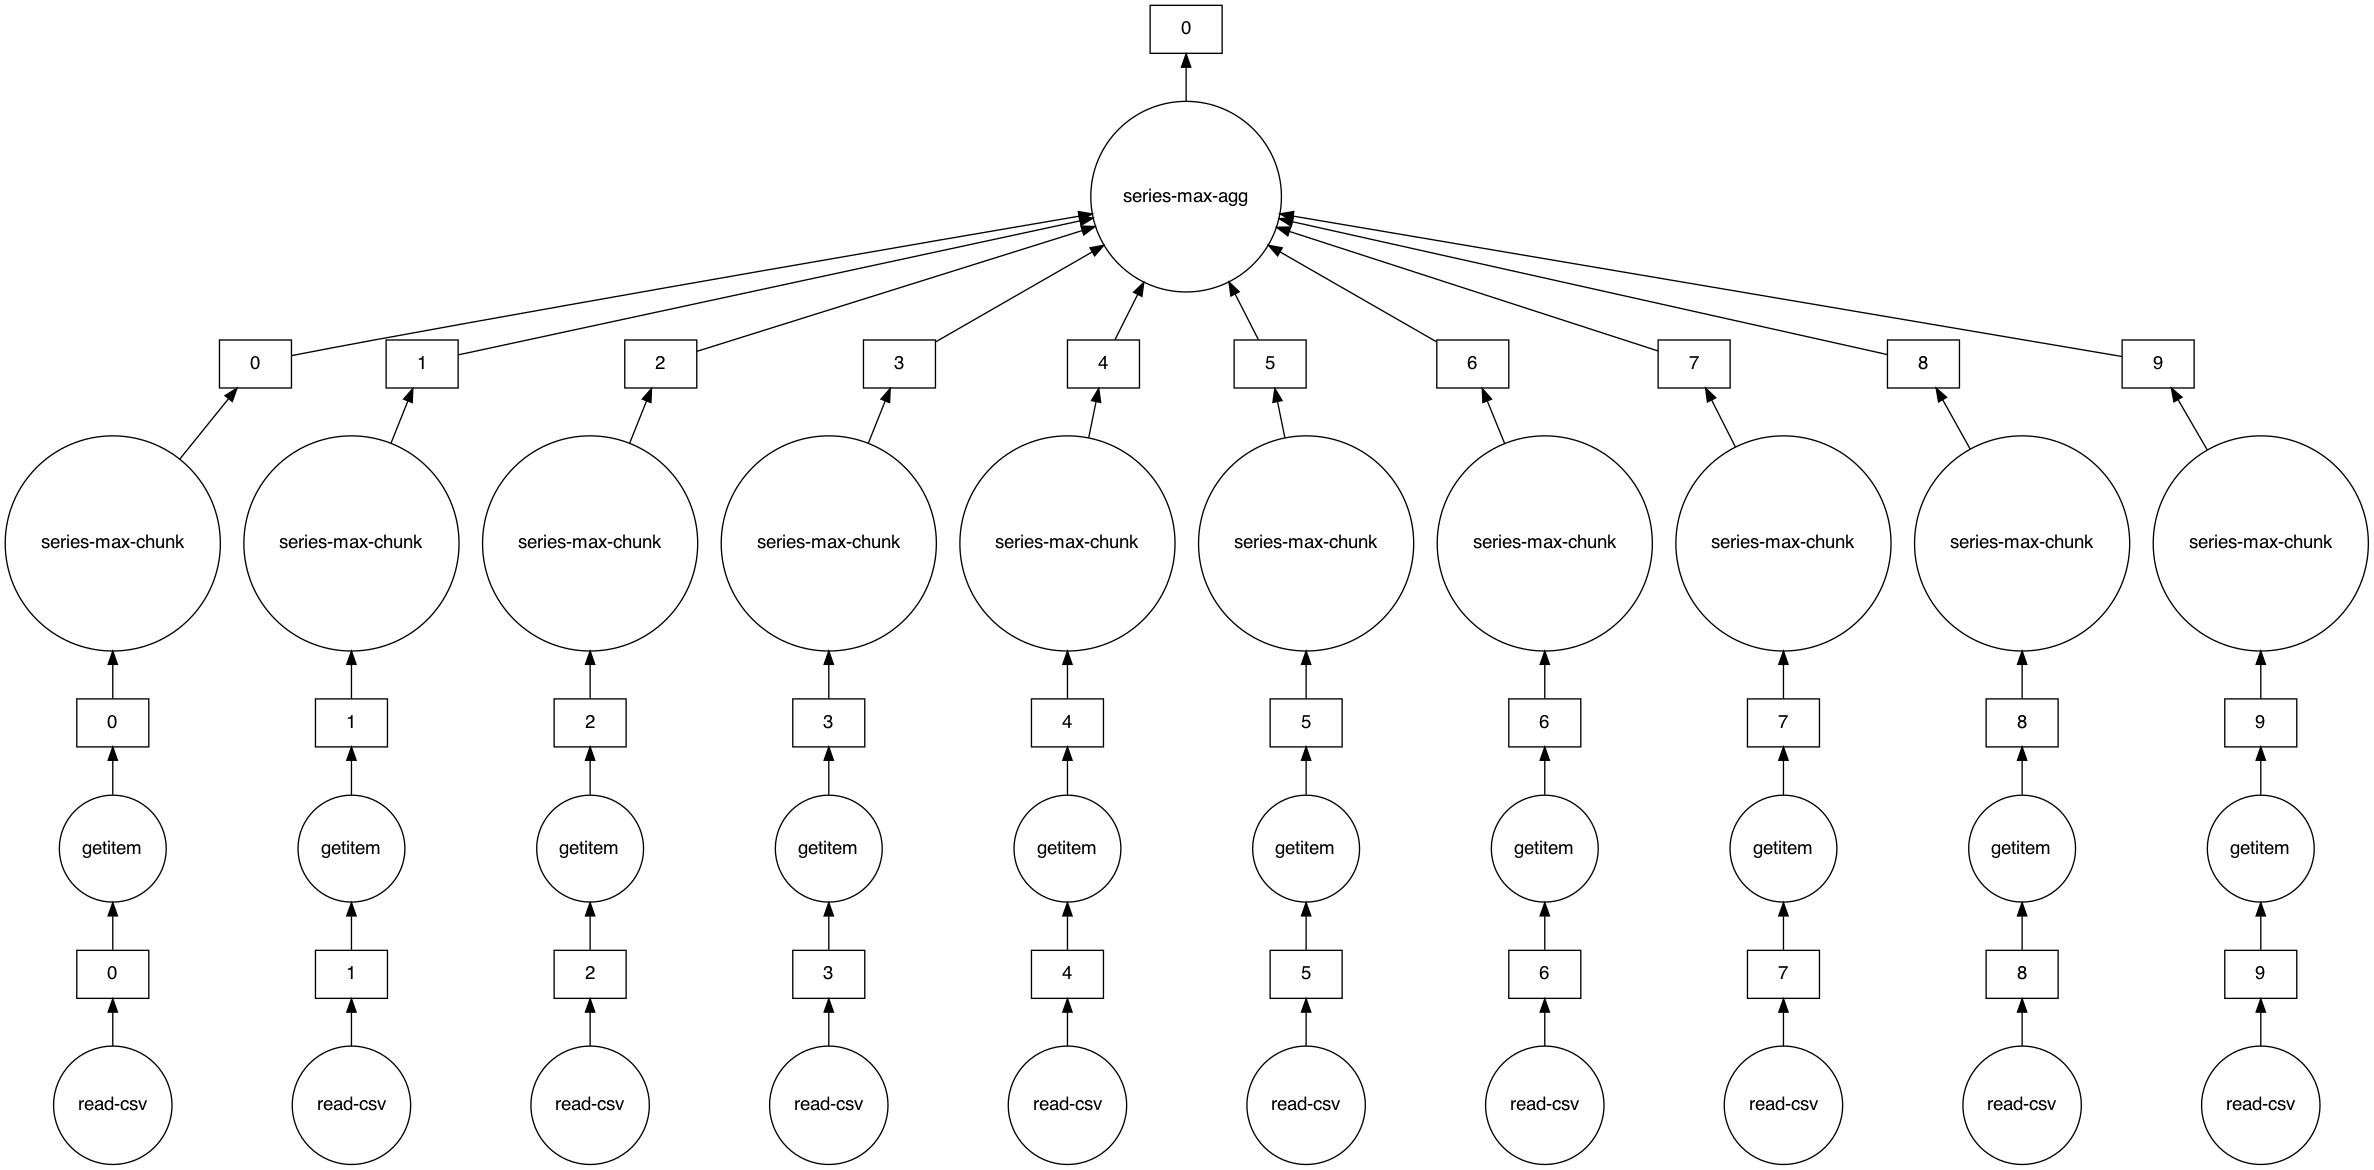

In [53]:
# notice the parallelism
df.DepDelay.max().visualize()

## Limitations

### What doesn't work?

Dask.dataframe only covers a small but well-used portion of the Pandas API.
This limitation is for two reasons:

1.  The Pandas API is *huge*
2.  Some operations are genuinely hard to do in parallel (e.g. sort)

Additionally, some important operations like ``set_index`` work, but are slower
than in Pandas because they include substantial shuffling of data, and may write out to disk.

Further limitations as from the nature of paralell computing. 

* global sort
* drop dublicates
* group by with large data frames
see best practises guide

## Machine Learning

[Dask-ML](https://dask-ml.readthedocs.io) has resources for parallel and distributed machine learning.


## Types of Scaling

There are a couple of distinct scaling problems you might face.
The scaling strategy depends on which problem you're facing.

1. CPU-Bound: Data fits in RAM, but training takes too long. Many hyperparameter combinations, a large ensemble of many models, etc.
2. Memory-bound: Data is larger than RAM, and sampling isn't an option.

* For in-memory problems, just use scikit-learn (or your favorite ML library).
* For large models, use `dask_ml.joblib` and your favorite scikit-learn estimator
* For large datasets, use `dask_ml` estimators

## The Sklearn example

In [67]:
from sklearn.datasets import make_classification,make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=10000, n_features=4, random_state=0)
X[:8]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-1.90879217, -1.1602627 , -0.27364545, -0.82766028],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 1.68616989,  1.6329131 , -1.42072654,  1.04050557],
       [-0.93912893, -1.02270838,  1.10093827, -0.63714432]])

In [56]:
estimator = SVC(random_state=0)
estimator.fit(X, y)

SVC(random_state=0)

In [57]:
estimator.score(X, y)

0.905

## Hyperparameter

Most models have *hyperparameters*. They affect the fit, but are specified up front instead of learned during training.

In [58]:
estimator = SVC(C=0.00001, shrinking=False, random_state=0)
estimator.fit(X, y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

## Hyperparameter Optimization

There are a few ways to learn the best *hyper*parameters while training. One is `GridSearchCV`.
As the name implies, this does a brute-force search over a grid of hyperparameter combinations.

In [59]:
%%time
estimator = SVC(gamma='auto', random_state=0, probability=True)
param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly'],
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2)
grid_search.fit(X, y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ................................C=0.001, kernel=rbf; total time=  10.5s
[CV] END ................................C=0.001, kernel=rbf; total time=   9.8s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.9s
[CV] END .................................C=10.0, kernel=rbf; total time=   3.2s
[CV] END .................................C=10.0, kernel=rbf; total time=   2.9s
[CV] END ................................C=10.0, kernel=poly; total time=   3.6s
[CV] END ................................C=10.0, kernel=poly; total time=   3.4s
CPU times: user 50.4 s, sys: 1.8 s, total: 52.2 s
Wall time: 49.3 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=0),
             param_grid={'C': [0.001, 10.0], 'kernel': ['rbf', 'poly']},
             verbose=2)

In [60]:
%%time
grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END .................................C=10.0, kernel=rbf; total time=   9.5s
[CV] END .................................C=10.0, kernel=rbf; total time=   9.9s
[CV] END ................................C=10.0, kernel=poly; total time=  11.0s
[CV] END ................................C=10.0, kernel=poly; total time=  11.8s
[CV] END ...............................C=0.001, kernel=poly; total time=  12.7s
[CV] END ...............................C=0.001, kernel=poly; total time=  12.8s
[CV] END ................................C=0.001, kernel=rbf; total time=  22.4s
[CV] END ................................C=0.001, kernel=rbf; total time=  22.6s
CPU times: user 15.2 s, sys: 1.22 s, total: 16.4 s
Wall time: 44.3 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 10.0], 'kernel': ['rbf', 'poly']},
             verbose=2)

### Now lets see, what dask can do 

## Multi-machine parallelism with Dask

Dask can talk to scikit-learn (via joblib) so that your *cluster* is used to train a model. 

`Joblib` is here the connection between Dask and sklearn (more can be found [here](https://joblib.readthedocs.io/en/latest/))

If you run this on a laptop, it will take quite some time, but the CPU usage will be satisfyingly near 100% for the duration. 

Be aware it might take time! 

To run faster, you would need a distributed cluster. That would mean putting something in the call to `Client` something like

```
c = Client('tcp://my.scheduler.address:8786')
```

Details on the many ways to create a cluster can be found [here](https://docs.dask.org/en/latest/setup/single-distributed.html).

In [62]:
import joblib
import dask.distributed



In [63]:
param_grid = {
    'C': [0.001, 0.1, 1.0, 2.5, 5, 10.0],
    # Uncomment this for larger Grid searches on a cluster
    # 'kernel': ['rbf', 'poly', 'linear'],
    # 'shrinking': [True, False],
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=5, n_jobs=-1)

In [64]:
%%time
with joblib.parallel_backend("dask", scatter=[X, y]):
    grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................................C=1.0; total time=  32.7s
[CV] END ..............................................C=2.5; total time=  32.8s
[CV] END ..............................................C=1.0; total time=  33.6s
[CV] END ..............................................C=0.1; total time=  39.9s
[CV] END ..............................................C=0.1; total time=  40.2s
[CV] END ..............................................C=0.1; total time=  40.8s
[CV] END ..............................................C=1.0; total time=  27.6s
[CV] END ..............................................C=1.0; total time=  27.7s
[CV] END ..............................................C=0.1; total time=  37.9s
[CV] END ..............................................C=0.1; total time=  37.6s
[CV] END ..............................................C=2.5; total time=  28.5s
[CV] END ........................................

In [65]:
grid_search.best_params_, grid_search.best_score_

({'C': 10.0}, 0.9119000000000002)

### Training on Large Datasets

Sometimes you'll want to train on a larger than memory dataset. `dask-ml` has implemented estimators that work well on dask arrays and dataframes that may be larger than your machine's RAM.

We'll make a small (random) dataset locally using scikit-learn.

In [70]:
n_centers = 12
n_features = 20

X_small, y_small = make_blobs(n_samples=1000, centers=n_centers, n_features=n_features, random_state=0)

centers = np.zeros((n_centers, n_features))

for i in range(n_centers):
    centers[i] = X_small[y_small == i].mean(0)
    
centers[:4]

array([[ 1.00796679,  4.34582168,  2.15175661,  1.04337835, -1.82115164,
         2.81149666, -1.18757701,  7.74628882,  9.36761449, -2.20570731,
         5.71142324,  0.41084221,  1.34168817,  8.4568751 , -8.59042755,
        -8.35194302, -9.55383028,  6.68605157,  5.34481483,  7.35044606],
       [ 9.49283024,  6.1422784 , -0.97484846,  5.8604399 , -7.61126963,
         2.86555735, -7.25390288,  8.89609285,  0.33510318, -1.79181328,
        -4.66192239,  5.43323887, -0.86162507,  1.3705568 , -9.7904172 ,
         2.3613231 ,  2.20516237,  2.20604823,  8.76464833,  3.47795068],
       [-2.67206588, -1.30103177,  3.98418492, -8.88040428,  3.27735964,
         3.51616445, -5.81395151, -7.42287114, -3.73476887, -2.89520363,
         1.49435043, -1.35811028,  9.91250767, -7.86133474, -5.78975793,
        -6.54897163,  3.08083281, -5.18975209, -0.85563107, -5.06615534],
       [-6.85980599, -7.87144648,  3.33572279, -7.00394241, -5.97224874,
        -2.55638942,  6.36329802, -7.97988653,  

The small dataset will be the template for our large random dataset.
We'll use `dask.delayed` to adapt `sklearn.datasets.make_blobs`, so that the actual dataset is being generated on our workers. 

In [71]:
n_samples_per_block = 200000
n_blocks = 500

delayeds = [dask.delayed(make_blobs)(n_samples=n_samples_per_block,
                                     centers=centers,
                                     n_features=n_features,
                                     random_state=i)[0]
            for i in range(n_blocks)]
arrays = [da.from_delayed(obj, shape=(n_samples_per_block, n_features), dtype=X.dtype)
          for obj in delayeds]
X = da.concatenate(arrays)
X

dask.array<concatenate, shape=(100000000, 20), dtype=float64, chunksize=(200000, 20), chunktype=numpy.ndarray>

In [72]:
#X = X.persist()  # Only run this on the cluster.

The algorithms implemented in Dask-ML are scalable. They handle larger-than-memory datasets just fine.

They follow the scikit-learn API, so if you're familiar with scikit-learn, you'll feel at home with Dask-ML.

In [77]:
from dask_ml.cluster import KMeans

In [78]:
clf = KMeans(init_max_iter=3, oversampling_factor=10)

In [83]:
c.cluster

In [ ]:
%time clf.fit(X)

In [ ]:
clf.labels_

In [ ]:
clf.labels_[:10].compute()

In [85]:
client.shutdown()
c.shutdown()

2022-06-15 17:03:04,403 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
2022-06-15 17:03:07,888 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
